In [58]:
pacman::p_load(ggplot2,ggpubr,phylotools,geiger,ggtreeExtra,data.table,
               phytools,phyloseq,ggtree,ape,grid,tidyr,wesanderson,
               ggnewscale,stringr,lubridate,ggridges,patchwork,ggstance,dendextend,tidyverse)

In [74]:
install.packages("remotes") 
remotes::install_github("YuLab-SMU/ggtree")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done




treeio   (1.16.2 -> 976d56438...) [GitHub]
crayon   (1.4.2  -> 1.5.0       ) [CRAN]
cli      (3.1.0  -> 3.2.0       ) [CRAN]
cpp11    (0.4.1  -> 0.4.2       ) [CRAN]
fansi    (0.5.0  -> 1.0.2       ) [CRAN]
pillar   (1.6.4  -> 1.7.0       ) [CRAN]
glue     (1.6.0  -> 1.6.1       ) [CRAN]
generics (0.1.1  -> 0.1.2       ) [CRAN]
Rcpp     (1.0.7  -> 1.0.8       ) [CRAN]
tidyr    (1.1.4  -> 1.2.0       ) [CRAN]
rlang    (0.4.12 -> 1.0.1       ) [CRAN]
magrittr (2.0.1  -> 2.0.2       ) [CRAN]
dplyr    (1.0.7  -> 1.0.8       ) [CRAN]
ape      (5.5    -> 5.6-1       ) [CRAN]
tidytree (0.3.6  -> 0.3.8       ) [CRAN]
jsonlite (1.7.2  -> 1.7.3       ) [CRAN]
ggfun    (0.0.4  -> 0.0.5       ) [CRAN]
aplot    (0.1.1  -> 0.1.2       ) [CRAN]


Installing 17 packages: crayon, cli, cpp11, fansi, pillar, glue, generics, Rcpp, tidyr, rlang, magrittr, dplyr, ape, tidytree, jsonlite, ggfun, aplot

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done





✔  checking for file ‘/tmp/RtmphizkGh/remotes2320c11bd8ef6/YuLab-SMU-treeio-976d564/DESCRIPTION’
─  preparing ‘treeio’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts (6.1s)
─  checking for empty or unneeded directories
─  building ‘treeio_1.19.1.tar.gz’
   
✔  checking for file ‘/tmp/RtmphizkGh/remotes2320c7f78608b/YuLab-SMU-ggtree-60be2d1/DESCRIPTION’
─  preparing ‘ggtree’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts (6.1s)
─  checking for empty or unneeded directories
─  building ‘ggtree_3.3.1.tar.gz’
   


In [5]:
sam_with_meta_bact <- data.frame(fread(file.path("..","..","data","sam_with_meta_bact.csv")))
sam_with_meta <- data.frame(fread(file.path("..","..","data","sam_with_meta_euk.csv")))
data_tree_bact <- data.frame(fread(file.path("..","..","data","data_tree_bact.csv")))
data_tree_euk <- data.frame(fread(file.path("..","..","data","data_tree_euk.csv")))

In [6]:
sam_with_meta_bact_filt <- data.frame(fread(file.path("..","..","data","sam_with_meta_bact_filt.csv")))
sam_with_meta_filt <- data.frame(fread(file.path("..","..","data","sam_with_meta_euk_filt.csv")))

In [17]:
for_plotting = sam_with_meta %>% dplyr::inner_join(data_tree_euk, by = c("X.rname" = "label","Label"))

for (row_curr in c(1:nrow(for_plotting))) {
    if (trimws(for_plotting$Phylum[row_curr]) == "Metazoa") {
        extra_slots = unlist(strsplit(for_plotting$AllOthers[row_curr],";"))
        if (length(extra_slots) == 11) {
            for_plotting$Phylum[row_curr] = trimws(extra_slots[1])
            for_plotting$Class[row_curr] = trimws(extra_slots[5])
            for_plotting$Order[row_curr] = trimws(extra_slots[9])
            for_plotting$Family[row_curr] = trimws(extra_slots[10])
            for_plotting$Genus[row_curr] = trimws(extra_slots[11])
        } else if (length(extra_slots == 7)) {
            for_plotting$Phylum[row_curr] = trimws(extra_slots[1])
            for_plotting$Class[row_curr] = trimws(extra_slots[3])
            for_plotting$Order[row_curr] = trimws(extra_slots[5])
            for_plotting$Family[row_curr] = trimws(extra_slots[6])
            for_plotting$Genus[row_curr] = trimws(extra_slots[7])
        }
        print(for_plotting[row_curr,])
    }
    if (trimws(for_plotting$Phylum[row_curr]) == "Opisthokonta") {
            for_plotting$Phylum[row_curr] = "Choanozoa"
            for_plotting$Class[row_curr] = "Ichthyosporea"
            for_plotting$Order[row_curr] = "Eccrinida"
            for_plotting$Family[row_curr] = "Piridae"
            for_plotting$Genus[row_curr] = "Pirum"
    }
    
    if (trimws(for_plotting$Phylum[row_curr]) == "Cryptophyceae") {
        for_plotting$Genus[row_curr] = for_plotting$Family[row_curr]
        for_plotting$Family[row_curr] = for_plotting$Order[row_curr]
        for_plotting$Order[row_curr] = for_plotting$Class[row_curr]
        for_plotting$Class[row_curr] = for_plotting$Phylum[row_curr]
        for_plotting$Phylum[row_curr] = "Cryptophyta"
    }
    
    if (trimws(for_plotting$Order[row_curr]) == "Fragilariophyceae") {
            for_plotting$Class[row_curr] = for_plotting$Order[row_curr]
            for_plotting$Order[row_curr] = for_plotting$Species[row_curr]
            for_plotting$Family[row_curr] = ""
            for_plotting$Genus[row_curr] = ""
            for_plotting$Species[row_curr] = ""
    } else if (trimws(for_plotting$Class[row_curr]) == "Bacillariophyta") {
            for_plotting$Class[row_curr] = for_plotting$Order[row_curr]
            for_plotting$Order[row_curr] = for_plotting$Species[row_curr]
            for_plotting$Family[row_curr] = ""
            for_plotting$Genus[row_curr] = ""
            for_plotting$Species[row_curr] = ""
    }
}
curr_cm="RF01960"
for_plotting = for_plotting %>%
    dplyr::mutate(Month = month(as.Date(SampleDate,origin="1970-01-01",format="%d%b%Y")),
                  Year = year(as.Date(SampleDate,origin="1970-01-01",format="%d%b%Y"))) %>%
    dplyr::select(-Phylum,-Genus,-Family,-Class,-Order,-Species,-Domain) %>%
    dplyr::left_join(read.csv(file.path("/vortexfs1", "omics", "alexander", "akrinos",
                                        "2021-mendota-18S","refseq-DIAMOND", 
                                        "tree-builder", "2021-12-20_eukaryota", paste0("taxonomy_dict_",curr_cm,
                     ".csv"))),by=c("X.rname"="qseqid")) %>%
    dplyr::mutate(Order = dplyr::case_when(Order == "Coscinodiscophycidae" ~ "Aulacoseirales",
                                           TRUE ~ Order))%>% 
    dplyr::group_by(Label) %>%
    dplyr::mutate(ZScore = (TPM - mean(TPM)) / sd(TPM)) %>%
    dplyr::ungroup()

In [18]:
head(for_plotting)

V1.x,X.rname,startpos,endpos,numreads,covbases,coverage,meandepth,meanbaseq,meanmapq,⋯,Clade.y,Subfamily.y,Species,Subphylum.y,Subclass.y,Suborder.y,Infraclass.y,Superorder.y,Superfamily.y,ZScore
<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Ga0453202_0004357SSU_rRNA_eukarya,1,4153,2,166,3.99711,0.0707922,37.0,3.500,⋯,Stramenopiles,,,,,,,,,-0.2632281
2,Ga0453202_0004357SSU_rRNA_eukarya,1,4153,2,166,3.99711,0.0707922,37.0,3.500,⋯,Stramenopiles,,,,,,,,,-0.2632281
11,Ga0335036_0006878SSU_rRNA_eukarya,1,2656,9,646,24.32230,0.5082830,36.6,0.889,⋯,Stramenopiles,,,,,,,,,-0.3320253
12,Ga0335036_0006878SSU_rRNA_eukarya,1,2656,9,646,24.32230,0.5082830,36.6,0.889,⋯,Stramenopiles,,,,,,,,,-0.3320253
19,Ga0335012_0002021SSU_rRNA_eukarya,1,2335,451,2316,99.18630,28.9388000,36.4,5.080,⋯,Metazoa,,,Crustacea,Phyllopoda,Anomopoda,,,,-0.4546942
20,Ga0335012_0002021SSU_rRNA_eukarya,1,2335,451,2316,99.18630,28.9388000,36.4,5.080,⋯,Metazoa,,,Crustacea,Phyllopoda,Anomopoda,,,,-0.4546942


In [19]:

make_euk_tree <- function(input_tree_file,input_tree_dict,cluster_all,chosen_layout="circular") {
  tree_file <- as.phylo(ggtree(input_tree_file,layout=chosen_layout))
  tree_plot <- as.data.frame(tree_file %>% fortify() %>%
                                   as_tibble()) 
  tree_plot <- tree_plot %>% dplyr::left_join(input_tree_dict,by=c("label"="Labels"))%>% 
        dplyr::left_join(cluster_all, by = c("qseqid" = "query")) %>%
        dplyr::filter((type == "S") | (is.na(type)))
  
  unique_phyla = unique(input_tree_dict$Phylum)
  unique_phyla = unique_phyla[unique_phyla != ""]
  # change this line
  tip_colors <- lapply(unique_phyla, function(x)
  {tree_plot$label[grepl(paste(x, collapse="|"),
                             tree_plot$Phylum)]})
  names(tip_colors) <- unique_phyla
  tip_colors <- Filter(function(x) length(x) > 0, tip_colors)
  #tree_file_to_plot <- as(tree_plot,"phylo") 
  for_input = drop.tip(ape::root(as.phylo(ggtree(tree_plot)), node = 86),
                tip=extract.clade(alveolate_tree,node=107)$tip.label[-1],subtree=FALSE)
  tree_to_plot <- groupOTU(for_input, tip_colors,
                              overlap="overwrite")
                       
  data_tree <- as.data.frame(ggtree(tree_to_plot)$data) %>%
        dplyr::left_join(input_tree_dict,by=c("label"="Labels"))%>% 
        dplyr::left_join(cluster_all, by = c("qseqid" = "query")) %>%
        dplyr::filter((type == "S") | (is.na(type)))
  data_tree = data_tree %>%
      dplyr::mutate(Metagenome = dplyr::case_when(grepl("rRNA",label) ~ "MG",
                                                  TRUE ~ "Ref")) %>%
      dplyr::mutate(Label = dplyr::case_when(Label == Label ~ Label,
                                      TRUE ~ "Ref"),
                    type = dplyr::case_when(Metagenome != "Ref" ~ type,
                                      TRUE ~ "S")) %>%
      dplyr::filter(type == "S")
  data_tree = data_tree %>%
    #dplyr::left_join(input_tree_dict,by=c("label"="Labels")) %>%
    dplyr::mutate(Metagenome = 
                    dplyr::case_when(Metagenome  == "Ref" ~ "Ref",
                                     Metagenome == "MG" ~ "MG",
                                     TRUE ~ "None"))
  return(data_tree)
}


In [20]:
colnames(for_plotting %>% dplyr::filter(TPM > 100))

[1] "V1.x"                                     
 [2] "X.rname"                                  
 [3] "startpos"                                 
 [4] "endpos"                                   
 [5] "numreads"                                 
 [6] "covbases"                                 
 [7] "coverage"                                 
 [8] "meandepth"                                
 [9] "meanbaseq"                                
[10] "meanmapq"                                 
[11] "TPM"                                      
[12] "Sample"                                   
[13] "AssemblyName"                             
[14] "X.x"                                      
[15] "totalreads"                               
[16] "propreads"                                
[17] "X.y"                                      
[18] "AnalysisIDs"                              
[19] "Assembly"                                 
[20] "Raw"                                      
[21] "SeqProjID"                                
[22] "Analysis.Project.GOLD.Analysis.Project.ID"
[23] "Analysis.Project.Analysis.Project.Name"   
[24] "Analysis.Project.Analysis.Project.Type"   
[25] "Analysis.Project.IMG.Submission.ID"       
[26] "Analysis.Project.Assembly.Method"         
[27] "Analysis.Project.Add.Date"                
[28] "Analysis.Project.IMG.Taxon.ID"            
[29] "Analysis.Project.ITS.Analysis.Project.ID" 
[30] "SampleDate"                               
[31] "type.x"                                   
[32] "clustnum.x"                               
[33] "seqlen.x"                                 
[34] "percid.x"                                 
[35] "plus.x"                                   
[36] "a.x"                                      
[37] "b.x"                                      
[38] "aln.x"                                    
[39] "target.x"                                 
[40] "Label"                                    
[41] "V1.y"                                     
[42] "parent"                                   
[43] "node"                                     
[44] "branch.length"                            
[45] "isTip"                                    
[46] "x"                                        
[47] "y"                                        
[48] "branch"                                   
[49] "angle"                                    
[50] "TipLab"                                   
[51] "qseqid"                                   
[52] "Lineage.x"                                
[53] "TopLevel.x"                               
[54] "Group.x"                                  
[55] "Clade.x"                                  
[56] "Subfamily.x"                              
[57] "Subphylum.x"                              
[58] "Subclass.x"                               
[59] "Suborder.x"                               
[60] "Infraclass.x"                             
[61] "Superorder.x"                             
[62] "Superfamily.x"                            
[63] "type.y"                                   
[64] "clustnum.y"                               
[65] "seqlen.y"                                 
[66] "percid.y"                                 
[67] "plus.y"                                   
[68] "a.y"                                      
[69] "b.y"                                      
[70] "aln.y"                                    
[71] "target.y"                                 
[72] "Metagenome"                               
[73] "Month"                                    
[74] "Year"                                     
[75] "Labels"                                   
[76] "Lineage.y"                                
[77] "TopLevel.y"                               
[78] "Domain"                                   
[79] "Phylum"                                   
[80] "Class"                                    
[81] "Order"                                    
[82] "Family"                   

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (stat_boxplot).”


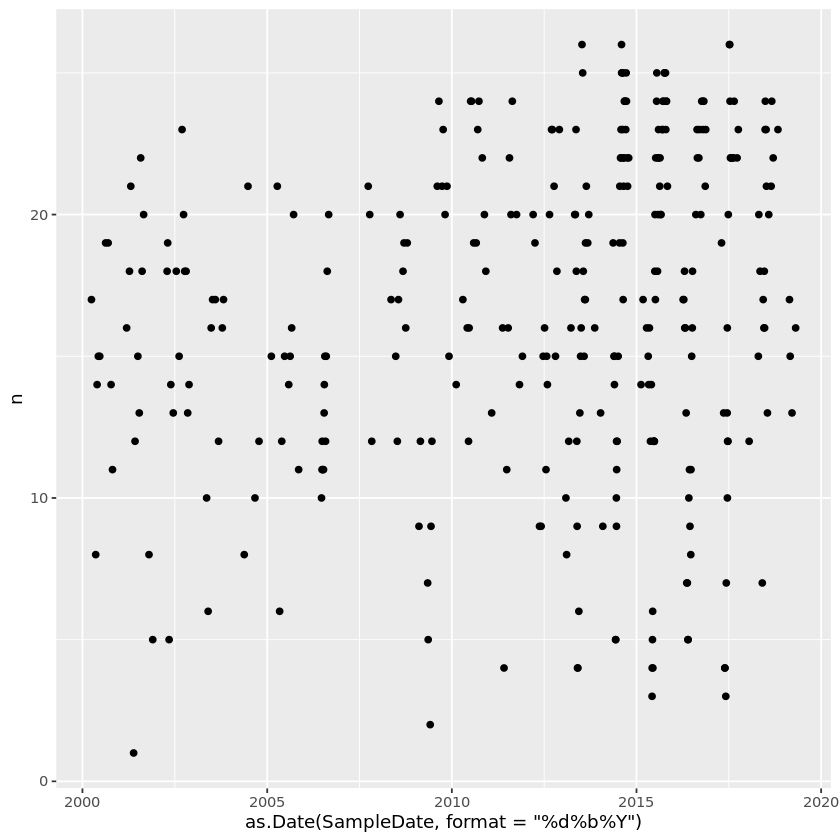

Warning message:
“Removed 1 rows containing missing values (geom_point).”


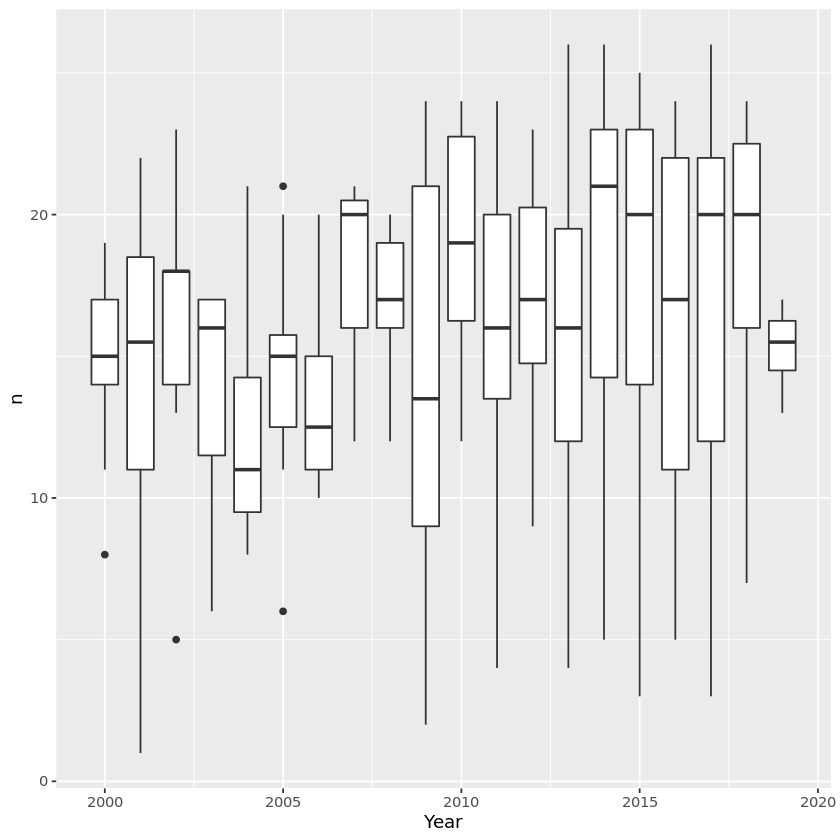

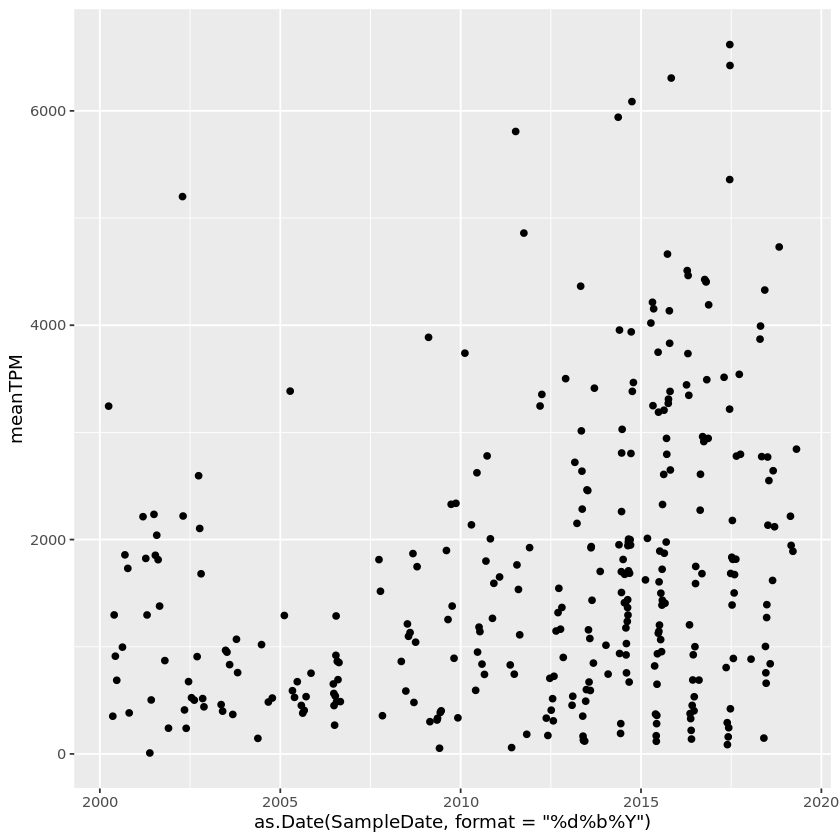

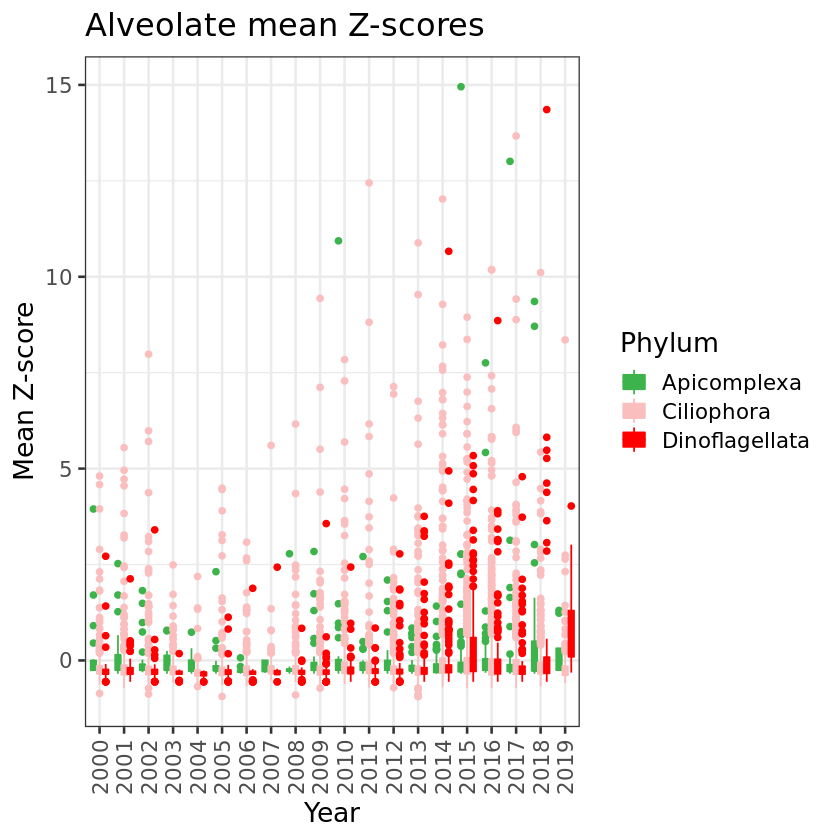

In [41]:
count_alveolates = for_plotting %>% dplyr::filter(TPM > 100) %>% 
    dplyr::filter((trimws(Phylum) == "Alveolata") | (trimws(Clade.y) == "Alveolata"))%>%
    dplyr::distinct(Genus,Family,Class,Order,SampleDate,.keep_all=TRUE) %>%
    dplyr::group_by(SampleDate) %>% dplyr::tally()
ggplot(count_alveolates) + geom_point(aes(x = as.Date(SampleDate,format="%d%b%Y"),
                                        y = n))

count_alveolates = for_plotting %>% dplyr::filter(TPM > 100) %>% 
    dplyr::filter((trimws(Phylum) == "Alveolata") | (trimws(Clade.y) == "Alveolata")) %>%
    dplyr::distinct(Genus,Family,Class,Order,SampleDate,.keep_all=TRUE) %>%
    dplyr::group_by(Year,SampleDate) %>% dplyr::tally()
ggplot(count_alveolates) + geom_boxplot(aes(x = Year,
                                        y = n,group=Year))


count_alveolates = for_plotting %>% 
    dplyr::filter((trimws(Phylum) == "Alveolata") | (trimws(Clade.y) == "Alveolata")) %>%
    dplyr::distinct(Genus,Family,Class,Order,SampleDate,.keep_all=TRUE) %>%
    dplyr::group_by(SampleDate) %>% dplyr::summarize(meanTPM = mean(TPM))
ggplot(count_alveolates) + geom_point(aes(x = as.Date(SampleDate,format="%d%b%Y"),
                                        y = meanTPM))

count_alveolates = for_plotting %>% 
    dplyr::filter((trimws(Phylum) == "Alveolata") | (trimws(Clade.y) == "Alveolata")) %>%
    dplyr::select(-Phylum,-Genus,-Family,-Class,-Order) %>%
    dplyr::left_join(read.csv(file.path("/vortexfs1", "omics", "alexander", "akrinos",
                                        "2021-mendota-18S","refseq-DIAMOND", 
                                        "tree-builder", "2021-12-20_alveolate", paste0("taxonomy_dict_",curr_cm,
                     ".csv"))),by=c("X.rname"="qseqid")) %>%
    dplyr::mutate(Phylum = dplyr::case_when(Phylum == "Alveolata" ~ "Dinoflagellata",
                                            TRUE ~ Phylum)) %>%
    dplyr::distinct(Genus,Phylum,Family,Class,Order,SampleDate,.keep_all=TRUE) %>%
    dplyr::group_by(SampleDate,Year,Phylum) %>%
    #dplyr::summarize(meanZScore = mean(ZScore),sdZScore = sd(ZScore)) %>%
    dplyr::filter(!is.na(Year))
data_tree_euk <- data.frame(fread(file.path("..","..","data","data_tree_euk.csv")))
distinct_phyla <- c(sort(c(unique(data_tree_euk$Phylum),c("Bacterial"))),"Dinoflagellata")
phylum_distinct_cols <- c('#e6194b', '#3cb44b', '#ffe119', '#4363d8', 'gray', '#911eb4', 
                   '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
                   '#9a6324', '#fffac8', '#800000', '#aaffc3', 
                   '#808000', '#ffd8b1', '#000075', '#808080',"red")#, '#ffffff', '#000000')

alveolate_boxplot = ggplot(count_alveolates) + geom_boxplot(aes(x = factor(Year),
                                        y = ZScore,fill=Phylum,color=Phylum)) + #,outlier.shape = NA) + 
    theme_bw(base_size=16) +
    ylab("Mean Z-score") + #scale_fill_manual(values=c("turquoise","pink","red","green")) +
    #scale_color_manual(values=c("turquoise","pink","red","green")) +
    scale_fill_manual(values=phylum_distinct_cols,breaks=distinct_phyla,name="Phylum") +
    scale_color_manual(values=phylum_distinct_cols,breaks=distinct_phyla,name="Phylum") +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + xlab("Year") +
    ggtitle("Alveolate mean Z-scores") #+ ylim(c(-0.2,5))#+ theme(legend.position="none")
alveolate_boxplot

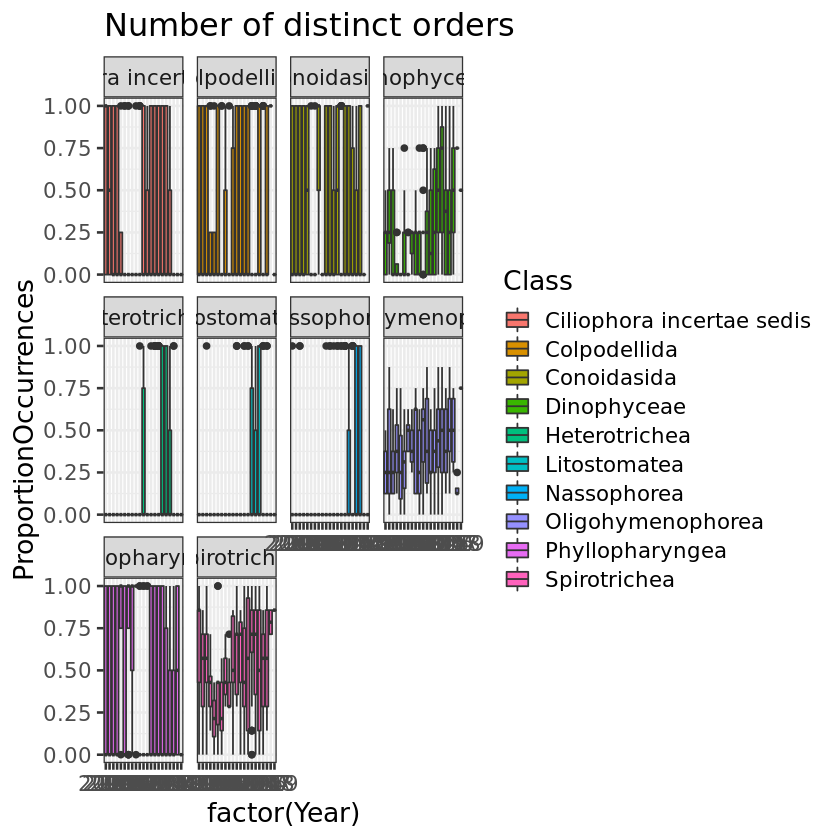

In [23]:
count_alveolates = for_plotting %>% 
    dplyr::filter((trimws(Phylum) == "Alveolata") | (trimws(Clade.y) == "Alveolata")) %>%
    dplyr::distinct(Genus,Family,Class,SampleDate,.keep_all=TRUE) %>%
    dplyr::mutate(TPMCat = dplyr::case_when(TPM > 500 ~ "Present",
                                  TPM < 500 ~ "Absent")) %>%
    dplyr::group_by(Year,SampleDate,Class,TPMCat) %>% 
    dplyr::tally() %>%
    tidyr::pivot_wider(id_cols = c(Year,SampleDate,Class), names_from = TPMCat, values_from = n) %>%
    tidyr::replace_na(list(Absent=0,Present=0)) %>%
    dplyr::mutate(ProportionOccurrences = Present/(Present+Absent))
alveolate_distinct = ggplot(count_alveolates) + geom_boxplot(aes(x = factor(Year), y = ProportionOccurrences,
                                                             fill = Class))+
    #scale_fill_manual(values=c("turquoise","pink","red","green")) + 
    facet_wrap(~Class) + 
    theme_bw(base_size=16) + 
    ggtitle("Number of distinct orders")
alveolate_distinct

`summarise()` has grouped output by 'Year'. You can override using the `.groups` argument.

Warning message:
“Removed 10 rows containing missing values (geom_tile).”


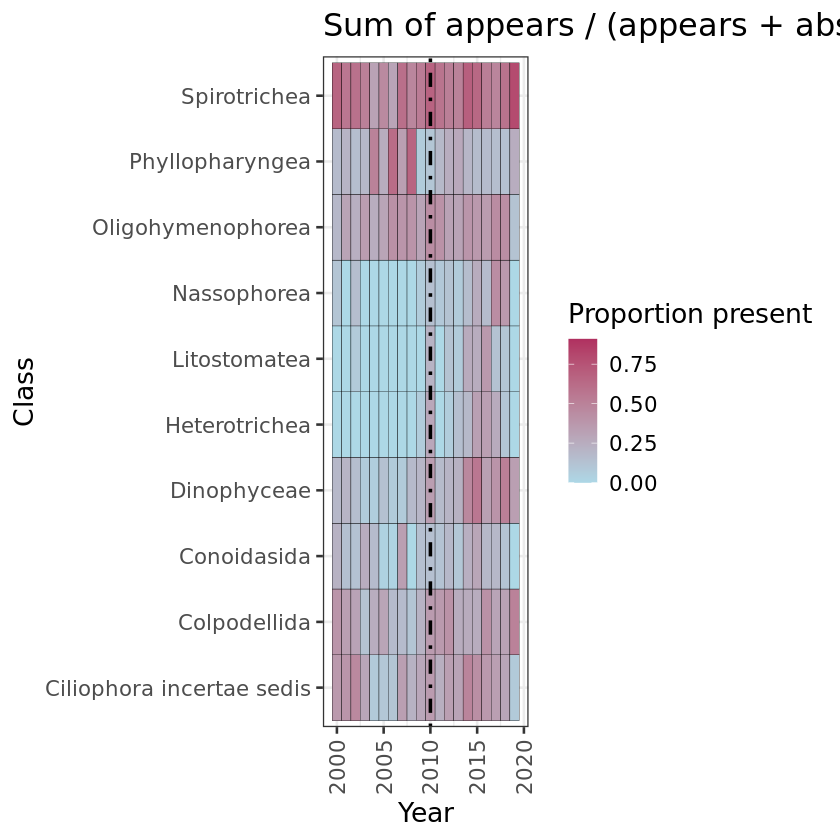

In [24]:
count_alveolates = for_plotting %>% dplyr::filter((trimws(Phylum) == "Alveolata")|
                                                  (trimws(Clade.y) == "Alveolata")) %>%
    dplyr::select(-Phylum,-Genus,-Family,-Class,-Order) %>%
    dplyr::left_join(read.csv(file.path("/vortexfs1", "omics", "alexander", "akrinos",
                                        "2021-mendota-18S","refseq-DIAMOND", 
                                        "tree-builder", "2021-12-20_alveolate",
                                        paste0("taxonomy_dict_",curr_cm,
                     ".csv"))),by=c("X.rname"="qseqid")) %>%
    dplyr::distinct(Genus,Family,Order,Class,Label,SampleDate,.keep_all=TRUE) %>%
    dplyr::mutate(TPMCat = dplyr::case_when(TPM > 500 ~ "Present",
                                  TPM < 500 ~ "Absent")) %>%
    dplyr::group_by(Year,SampleDate,Family,Order,Label,Class,TPMCat) %>% 
    dplyr::tally() %>%
    tidyr::pivot_wider(id_cols = c(Year,SampleDate,Order,Class,Family,Label), names_from = TPMCat, values_from = n) %>%
    tidyr::replace_na(list(Absent=0,Present=0)) %>%
    dplyr::ungroup() %>%
    dplyr::group_by(Year,Class) %>%
    dplyr::summarize(Present = sum(Present), Absent = sum(Absent)) %>%
    dplyr::mutate(ProportionOccurrences = Present / (Present + Absent))
    #dplyr::mutate(ProportionOccurrences = Present/(Present+Absent))

alveolate_heatmap = ggplot(count_alveolates) + 
    geom_tile(aes(x = Year, y = Class, fill = ProportionOccurrences),col="black") + 
    #geom_point(aes(x = as.Date(SampleDate,format="%d%b%Y"), y = ProportionOccurrences, 
    #               fill = Family, size = Year),
    #           pch=21,alpha=0.5) + 
    #geom_line(aes(x = as.Date(SampleDate,format="%d%b%Y"), y = ProportionOccurrences,
    #              group = Family)) + 
#geom_bar(aes(x = as.Date(SampleDate,format="%d%b%Y"), 
#                                                             y = Present,
#                                                             fill = Class),stat="identity")+
    theme_bw(base_size=16) + #theme(legend.position="none") +
    scale_fill_gradient(low = "light blue", high = "maroon", name = "Proportion present") + 
    geom_vline(aes(xintercept=2010),size=1,linetype="dotdash") + 
    scale_size(name="Year") + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + xlab("Year") +
    ggtitle("Sum of appears / (appears + absent) ")
alveolate_heatmap

## Alveolate tree

In [25]:
folder_stub = file.path("/vortexfs1", "omics", "alexander", "akrinos", "2021-mendota-18S",
                        "refseq-DIAMOND", "tree-builder", "2021-12-20_alveolate")

In [26]:
alveolate_tree <- read.tree(file.path(folder_stub,"iqtree_select",
                                     "total_tree_RF01960.treefile"))

In [27]:
alveolate_tree <- read.tree(file.path(folder_stub,"iqtree_select",
                                     "total_tree_RF01960.treefile"))
rooted.tree.alv <- ape::root(alveolate_tree, node = 86)
rooted.tree.alv <- alveolate_tree

split_labs = c()
for (curr_lab in alveolate_tree$tip.label) {
    if (grepl("\\|", curr_lab)) {
        split_labs = c(split_labs,unlist(strsplit(unlist(strsplit(curr_lab, "\\|"))[2],"\\."))[1])
    } else {
        split_labs = c(split_labs,unlist(strsplit(unlist(strsplit(curr_lab, "\\|"))[1],"\\."))[1])
    }
}
alveolate_tree$tip.label = split_labs

In [33]:
# Filter the output by the OTUs that have more than 10 entries across 
# the samples (clustered at 97%)
cluster_files = c(paste0("meta-lakes/2021-06-11_treebuilder/clustered_contigs/", 
                 "reference.RF01960.clusters"),
                 paste0("meta-lakes/2021-06-11_treebuilder/clustered_contigs/", 
                 "reference.RF00177.clusters"))
cluster_files = c("/vortexfs1/omics/alexander/akrinos/2021-mendota-18S/refseq-DIAMOND/2021-11-07_treebuilder/clustered_contigs/reference.RF01960.clusters",
                  "/vortexfs1/omics/alexander/akrinos/2021-mendota-18S/refseq-DIAMOND/2021-11-07_treebuilder/clustered_contigs/reference.RF00177.clusters")
cluster_all = data.frame()
for (cluster_file in cluster_files) {
    clust_f = read.csv(cluster_file,sep="\t",header=FALSE)
    colnames(clust_f)=c("type","clustnum","seqlen",
                        "percid","plus","a","b",
                        "aln","query","target")
    if (grepl("RF01960",cluster_file)) {
        clust_f["clustnum"] = -1*(as.numeric(clust_f$clustnum) + 1)
    }
    clust_f["Label"] = 0
    for (curr in 1:nrow(clust_f)) {
        if (clust_f$clustnum[curr] < 0) {
            clust_f[curr,"Label"] = paste0("MEND-TF-18S-",as.character(abs(clust_f[curr,"clustnum"])))
        } else {
            clust_f[curr,"Label"] = paste0("MEND-TF-16S-",as.character(abs(clust_f[curr,"clustnum"])))
        }
    }
    cluster_all = cluster_all %>% dplyr::bind_rows(clust_f)
}

In [34]:
tree_file_alv_mod = alveolate_tree

folder_stub = file.path("/vortexfs1", "omics", "alexander", "akrinos", "2021-mendota-18S",
                        "refseq-DIAMOND", "tree-builder", "2021-12-20_alveolate")
#data_tree_alv_mod <- make_data_tree_euk(tree_file_alv_mod, folder_stub_curr = folder_stub, #
#                              file_tax ="taxonomy_dict_RF01960.csv", layout = "circular")
curr_cm = "RF01960"
data_tree_alv_mod = make_euk_tree(tree_file_alv_mod,read.csv(file.path(folder_stub,
                                                                        paste0("taxonomy_dict_",curr_cm,
                     ".csv"))),chosen_layout="circular",cluster_all=cluster_all)

data_tree_alv_mod$Phylum[((data_tree_alv_mod$isTip) & is.na(data_tree_alv_mod$Phylum)) | 
                         (grepl("Ochrophyta",data_tree_alv_mod$Phylum)) ] = "Ochrophyta"
data_tree_alv_mod = data_tree_alv_mod %>% dplyr::mutate(x = dplyr::case_when(x > 4 ~ x - 4,
                                                            TRUE ~ x))
data_tree_alv_mod$Metagenome[data_tree_alv_mod$Phylum == "Ochrophyta"] = "Outgroup"

In [35]:
barplot_df = data_tree_alv_mod %>%
    dplyr::left_join(cluster_all %>% dplyr::group_by(target) %>% 
                      dplyr::distinct(query,target) %>% 
    dplyr::tally() ,by=c("label"="target")) %>%
    dplyr::select(n,label,Class,y) %>%
    dplyr::filter(!is.na(label)) %>%
    dplyr::rename("id"="label","val"="n")

In [42]:
families_list = na.omit(unique((data_tree_alv_mod %>% dplyr::filter(Phylum != "Ochrophyta"))$Class))
hilight_frame = data.frame()
for (curr_fam in families_list) {
    hilight_frame = hilight_frame %>%
        dplyr::bind_rows(data.frame("Nodes" = ggtree::MRCA(as.phylo(ggtree(data_tree_alv_mod)), 
                                              (data_tree_alv_mod %>% dplyr::filter(grepl(curr_fam,Class)))$label),
               "Labels" = c(curr_fam)))
}
distinct_cols=c("#c74eaf","#52bc60","#9c5bca","#90b53d","#656fc5",
                "#cea947","#5ba5d7","#d0463f","#52b598","#d2457f","#54823f",
                "#c683bf","#8b7535","#b9606e","#cb753f")
#ggtree(data_tree_alv_mod) + #geom_tiplab(aes(label=Class)) + 
p1<-ggplot(data_tree_alv_mod,aes(x=x,y=y)) + #%>% collapse(node=107) +
    #geom_hilight(data=hilight_frame, aes(node= Nodes, fill = Labels),extend=0.3,alpha=0.25) + #, extendto=2) + 
    geom_tree(layout="roundrect") +
    geom_point2(aes(subset=(node==23)), shape=21, size=5, fill='green') + 
    geom_tippoint(data=data_tree_alv_mod, #%>% dplyr::filter(Metagenome == "MG"),
                  aes(shape=Metagenome,color=Class,size=Metagenome)) + 
    scale_color_manual(values = distinct_cols, breaks=na.omit(unique(data_tree_alv_mod$Class)),
                       labels = na.omit(unique(data_tree_alv_mod$Class)),
                       na.value="black")+ 
    scale_fill_manual(values = distinct_cols, breaks=na.omit(unique(data_tree_alv_mod$Class)),
                       labels = na.omit(unique(data_tree_alv_mod$Class)),
                       na.value="black", name = "Class group") +
    scale_size_manual(breaks=c("MG","Ref","Outgroup"),values=c(3,1,0.25))+
    scale_shape_manual(breaks=c("MG","Ref","Outgroup"),values=c(15,16,17)) + 
    theme_void(base_size=16) #+
    #geom_fruit(
    #          data=barplot_df,
    #          geom=geom_barh,
    #          mapping=aes(x = val, y=y, 
    #                      fill=Class),
    #          color = "grey50", stat = "identity"
    #      )

#ggtree::facet_plot(p1,panel="number extracted sequences", data=barplot_df,
#           geom=geom_barh, mapping=aes(x=as.numeric(val),fill=Class),stat="identity")

In [43]:
patchwork_phylo = ((p1 + guides(fill="none", color="none")) + ggtitle("A")) + 
    (ggplot(barplot_df) + geom_barh(aes(x = val, y = y, 
                                         fill= Class),stat="identity") + theme_minimal(base_size=16) + 
    scale_fill_manual(values = distinct_cols, breaks=na.omit(unique(data_tree_alv_mod$Class)),
                       labels = na.omit(unique(data_tree_alv_mod$Class)),
                       na.value="black", name = "Class group") +
    ggtitle("B") + xlab("Number of extracted rRNAs (97%)") + theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()))+
    plot_layout(guides = 'collect',widths=c(2,1))

Warning message:
“Removed 30 rows containing missing values (position_stack).”
Warning message:
“Removed 10 rows containing missing values (geom_tile).”
Warning message:
“Removed 30 rows containing missing values (position_stack).”
Warning message:
“Removed 10 rows containing missing values (geom_tile).”


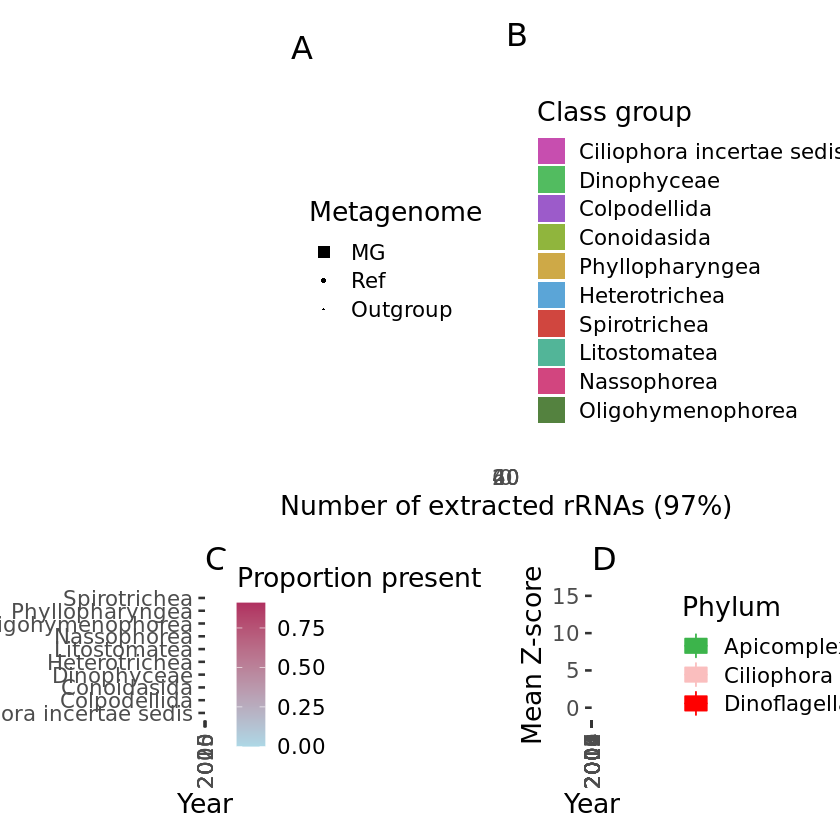

In [47]:
(patchwork_phylo / ((alveolate_heatmap+ggtitle("C"))  | (alveolate_boxplot+ggtitle("D")))) + 
  plot_layout(heights = c(3, 1)) & plot_layout(guides="collect")
ggsave("../../figures/alveolate_panel.png",height=12,width=18,units="in",dpi=400)

Warning message:
“Removed 30 rows containing missing values (position_stack).”
Warning message:
“Removed 10 rows containing missing values (geom_tile).”
Warning message:
“Removed 30 rows containing missing values (position_stack).”
Warning message:
“Removed 10 rows containing missing values (geom_tile).”
Warning message:
“Removed 30 rows containing missing values (position_stack).”
Warning message:
“Removed 10 rows containing missing values (geom_tile).”


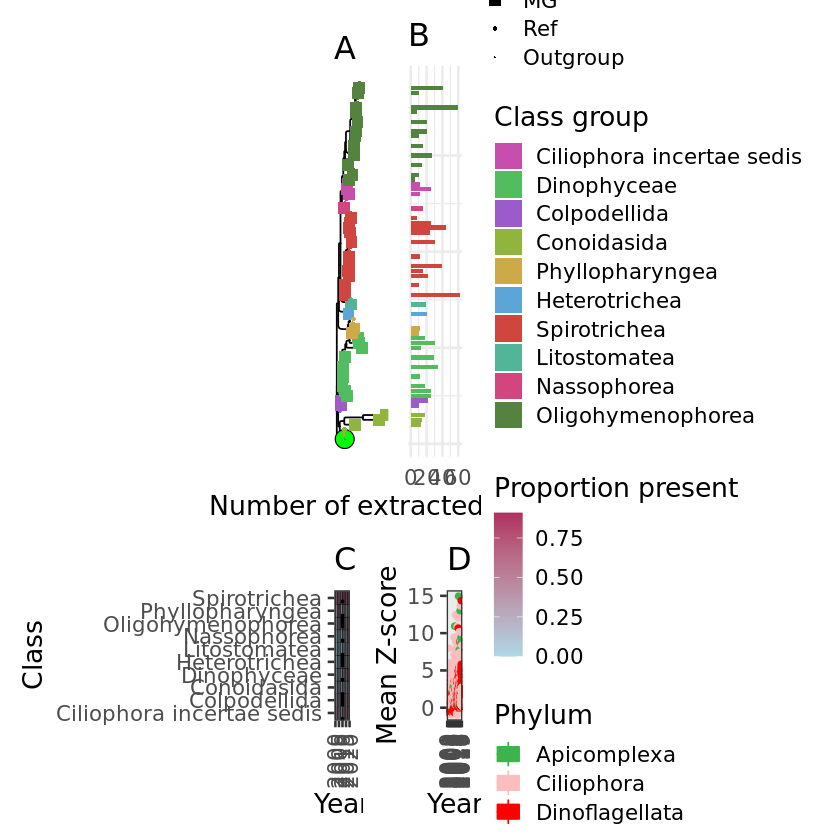

In [78]:
((p1 + guides(fill="none", color="none")) + ggtitle("A") | 
    (ggplot(barplot_df) + aplot::ylim2(p1) + geom_barh(aes(x = val, y = y, 
                                         fill= Class),stat="identity") + theme_minimal(base_size=16) + 
    scale_fill_manual(values = distinct_cols, breaks=na.omit(unique(data_tree_alv_mod$Class)),
                       labels = na.omit(unique(data_tree_alv_mod$Class)),
                       na.value="black", name = "Class group") +
    ggtitle("B") + xlab("Number of extracted rRNAs (97%)") + theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()))) / ((alveolate_heatmap+ggtitle("C"))  | (alveolate_boxplot+ggtitle("D"))) + 
  plot_layout(heights = c(3, 1),guides="collect")
ggsave("../../figures/alveolate_panel.png",height=13,width=15,units="in",dpi=400)
ggsave("../../figures/alveolate_panel.pdf",height=13,width=15,units="in",dpi=400)

Warning message in as_grob.default(plot):
“Cannot convert object of class aplot into a grob.”
Warning message:
“Removed 10 rows containing missing values (geom_tile).”


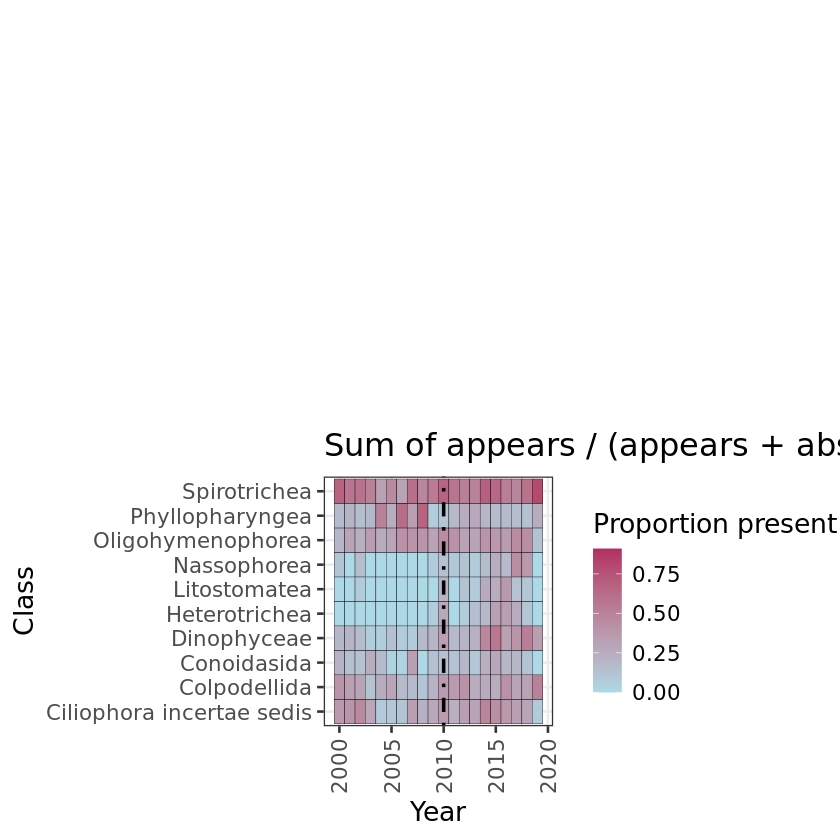

In [71]:
cowplot::plot_grid((((p1 + guides(fill="none", color="none"))) %>% 
    aplot::insert_right(ggplot(barplot_df) + geom_barh(aes(x = val, y = y, 
                                         fill= Class),stat="identity") + theme_minimal(base_size=16) + 
    scale_fill_manual(values = distinct_cols, breaks=na.omit(unique(data_tree_alv_mod$Class)),
                       labels = na.omit(unique(data_tree_alv_mod$Class)),
                       na.value="black", name = "Class group") +
    xlab("Number of extracted rRNAs (97%)") + theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()))),alveolate_heatmap,nrow=2)